## import libs


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Question 1

Download the data set `adult-modified.csv` and load it into an appropriate data structure such as a Pandas dataframe. Explore the general characteristics of the data as a whole: examine the means, standard deviations, and other statistics associated with the numeric attributes and frequencies associated with categorical attributes.

In [2]:
# read data file
adlt_df = pd.read_csv('../data/adult-modified.csv')

In [3]:
adlt_df.head()

,age,workclass,education,marital-status,race,sex,hours-per-week,income
0,39,Public,13,Single,White,Male,40,<=50K
1,50,Self-emp,13,Married,White,Male,13,<=50K
2,38,Private,9,Single,White,Male,40,<=50K
3,53,Private,7,Married,Black,Male,40,<=50K
4,28,Private,13,Married,Black,Female,40,<=50K


In [4]:
# data types
adlt_df.dtypes

age                int64
workclass         object
education          int64
marital-status    object
race              object
sex               object
hours-per-week     int64
income            object
dtype: object

In [5]:
# statistics of numeric features
adlt_df.describe()

,age,education,hours-per-week
count,9412.000000,9412.000000,9412.000000
mean,38.357310,10.125266,41.080217
std,12.962135,2.542118,11.884590
min,17.000000,1.000000,1.000000
25%,28.000000,9.000000,40.000000
50%,37.000000,10.000000,40.000000
75%,47.000000,13.000000,45.000000
max,90.000000,16.000000,99.000000


In [6]:
# get frequency of categorical features from df
[(adlt_df[cat_col].value_counts()) for cat_col in adlt_df.select_dtypes('object').columns]

[workclass
 Private     6947
 Public      1317
 Self-emp    1148
 Name: count, dtype: int64,
 marital-status
 Married    4737
 Single     4675
 Name: count, dtype: int64,
 race
 White          8062
 Black           892
 Asian           291
 Amer-Indian      92
 Hispanic         75
 Name: count, dtype: int64,
 sex
 Male      6383
 Female    3029
 Name: count, dtype: int64,
 income
 <=50K    7093
 >50K     2319
 Name: count, dtype: int64]

# Question 2

For the three numeric attributes (age, hours-per-week, education), display box plots that show the overall dispersion and skew in these variables. Next, create histograms for these three variables showing the overall data distribution in each. Finally, display a scatter plot of age (x-axis) vs. hours-per-week (y-axis).

In [7]:
# filter numeric dataframe
num_df = adlt_df.select_dtypes('int')

In [8]:
num_df

,age,education,hours-per-week
0,39,13,40
1,50,13,13
2,38,9,40
3,53,7,40
4,28,13,40
...,...,...,...
9407,38,10,60
9408,25,9,8
9409,21,10,40
9410,38,2,53


## Boxplots

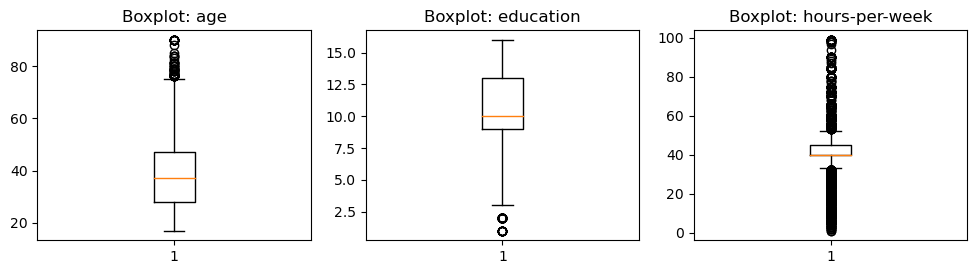

In [9]:
# create subplots canvas
plt.figure(figsize=(12, 6))
ax1 = plt.subplot(2,3,1)
ax2 = plt.subplot(2,3,2)
ax3 = plt.subplot(2,3,3)

## plotting boxplot to subplots
ax1.boxplot(num_df.age, )
ax1.set_title('Boxplot: age')
# ax1.set_ylabel('Age')
ax2.boxplot(num_df.education)
ax2.set_title('Boxplot: education')
# ax2.set_ylabel('education')
ax3.boxplot(num_df['hours-per-week'])
ax3.set_title('Boxplot: hours-per-week')
# ax3.set_ylabel('hours-per-week')
plt.show()

## Histogram

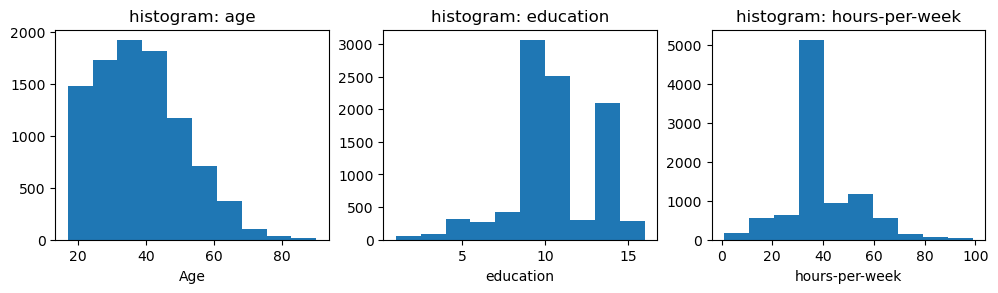

In [10]:
# create subplots canvas
plt.figure(figsize=(12, 6))
ax1 = plt.subplot(2,3,1)
ax2 = plt.subplot(2,3,2)
ax3 = plt.subplot(2,3,3)

## plotting histograms to subplots
ax1.hist(num_df.age, )
ax1.set_title('histogram: age')
ax1.set_xlabel('Age')
ax2.hist(num_df.education)
ax2.set_title('histogram: education')
ax2.set_xlabel('education')
ax3.hist(num_df['hours-per-week'])
ax3.set_title('histogram: hours-per-week')
ax3.set_xlabel('hours-per-week')
plt.show()

## Scatter plot

Text(0.5, 1.0, 'Scatter plot Age vs Hours-per-week')

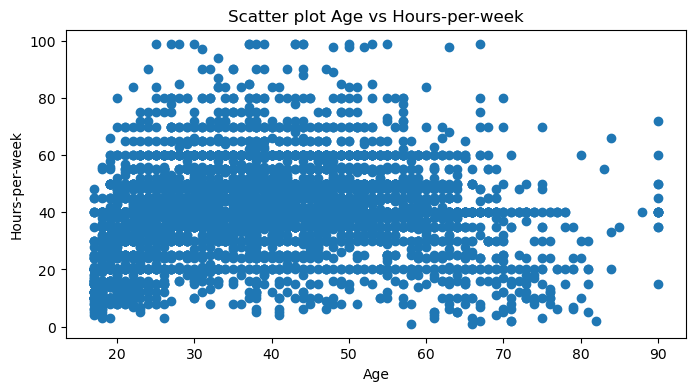

In [11]:
# scatter plot of age vs hours-per-week

plt.figure(figsize=(8, 4))
plt.scatter(x=num_df['age'], y=num_df['hours-per-week'])
plt.xlabel('Age')
plt.ylabel('Hours-per-week')
plt.title('Scatter plot Age vs Hours-per-week')

# Question 3

For the remaining categorical attributes create bar charts that show the distribution of category frequencies (e.g., married vs. single; private vs. public vs. self-emp; etc). Ideally, you should use bar charts in a single figure similar to this figure.

In [12]:
# filter categorical data
cat_df = adlt_df.select_dtypes('object')

In [13]:
cat_df.head()

,workclass,marital-status,race,sex,income
0,Public,Single,White,Male,<=50K
1,Self-emp,Married,White,Male,<=50K
2,Private,Single,White,Male,<=50K
3,Private,Married,Black,Male,<=50K
4,Private,Married,Black,Female,<=50K


In [14]:
# create counts dataframe

cnt_df = pd.DataFrame()
for col in cat_df.columns:
    tmp_df = pd.DataFrame(cat_df[col].value_counts()).reset_index().rename({f'{col}':'value'}, axis=1)
    tmp_df['col_name'] = col
    cnt_df = pd.concat([cnt_df, tmp_df], axis=0)

In [15]:
# reset index
cnt_df.reset_index(drop=True, inplace=True)

In [16]:
cnt_df

,value,count,col_name
0,Private,6947,workclass
1,Public,1317,workclass
2,Self-emp,1148,workclass
3,Married,4737,marital-status
4,Single,4675,marital-status
5,White,8062,race
6,Black,892,race
7,Asian,291,race
8,Amer-Indian,92,race
9,Hispanic,75,race


<BarContainer object of 2 artists>

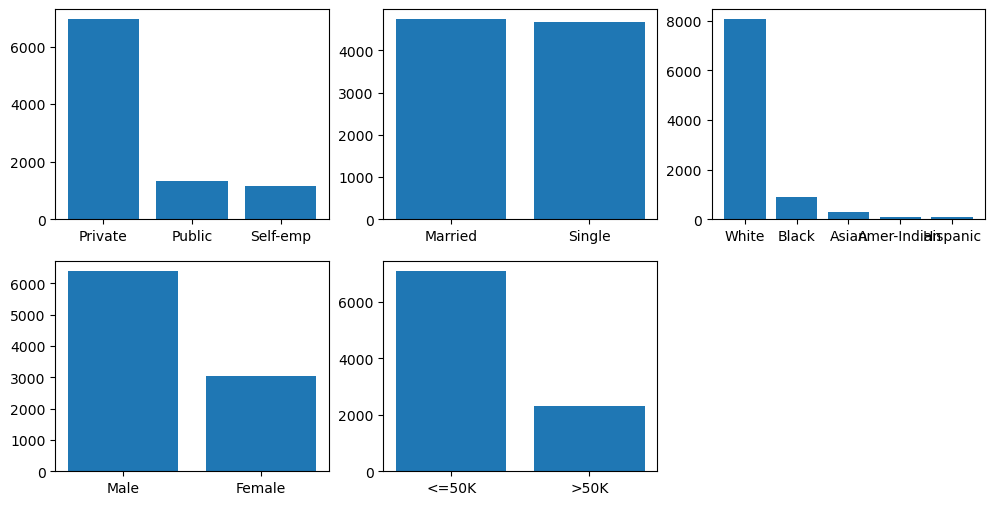

In [17]:
# create subplots canvas
plt.figure(figsize=(12, 6))
ax1 = plt.subplot(2,3,1)
ax2 = plt.subplot(2,3,2)
ax3 = plt.subplot(2,3,3)
ax4 = plt.subplot(2,3,4)
ax5 = plt.subplot(2,3,5)

## plotting barplots to subplots
ax1.bar(cnt_df[cnt_df.col_name=='workclass']['value'], cnt_df[cnt_df.col_name=='workclass']['count'])
ax2.bar(cnt_df[cnt_df.col_name=='marital-status']['value'], cnt_df[cnt_df.col_name=='marital-status']['count'])
ax3.bar(cnt_df[cnt_df.col_name=='race']['value'], cnt_df[cnt_df.col_name=='race']['count'])
ax4.bar(cnt_df[cnt_df.col_name=='sex']['value'], cnt_df[cnt_df.col_name=='sex']['count'])
ax5.bar(cnt_df[cnt_df.col_name=='income']['value'], cnt_df[cnt_df.col_name=='income']['count'])


# Question 4

Perform a cross-tabulations of each of the workclass and race attributes with the income attribute. Show the resulting cross-tab tables as well as bar charts to visualize the relationships between these pairs of attributes. [Hint: you can use aggregation functions in Pandas such as groupby() and  cross-tab(), then either using Matplotlib directly or the plot() function in Pandas create the bar charts]. As an illustration, consider this graph depicting the cross-tabulation of sex with income. In the case of race vs. income cross-tab, create another chart comparing the percentages of each race category that fall in the low-income group.

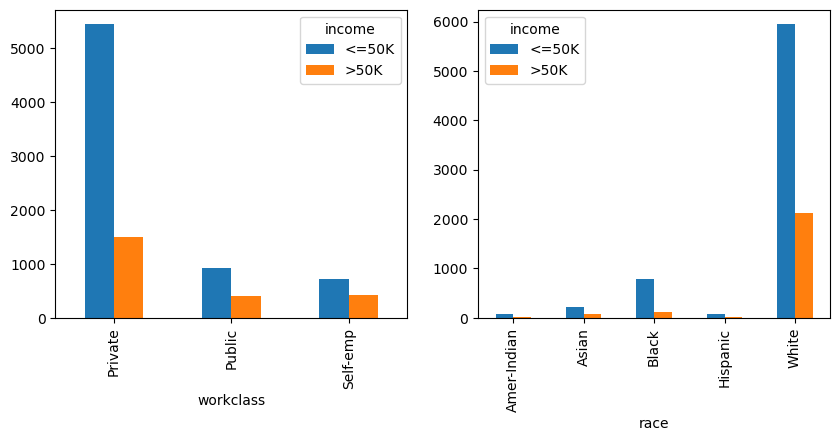

In [18]:
# subplots canvas
plt.figure(figsize=(10, 4))
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)

## plotting crosstab to subplots
pd.crosstab(cat_df.workclass, cat_df.income).plot(kind='bar', ax=ax1)
pd.crosstab(cat_df.race, cat_df.income).plot(kind='bar', ax=ax2)
plt.show()

In [19]:
# count race by income group
plt_df = cat_df.groupby(['income', 'race']).size().reset_index().rename({0:'count'}, axis=1)

In [20]:
plt_df

,income,race,count
0,<=50K,Amer-Indian,83
1,<=50K,Asian,224
2,<=50K,Black,773
3,<=50K,Hispanic,69
4,<=50K,White,5944
5,>50K,Amer-Indian,9
6,>50K,Asian,67
7,>50K,Black,119
8,>50K,Hispanic,6
9,>50K,White,2118


In [21]:
# get total counts of race
plt_df['total_count'] = plt_df.race.map(dict(cat_df.race.value_counts()))

In [22]:
# calculate percent race
plt_df['race_percent'] = (plt_df['count']/plt_df['total_count'])*100

Text(0.5, 1.0, 'Percentage of race in low-income group')

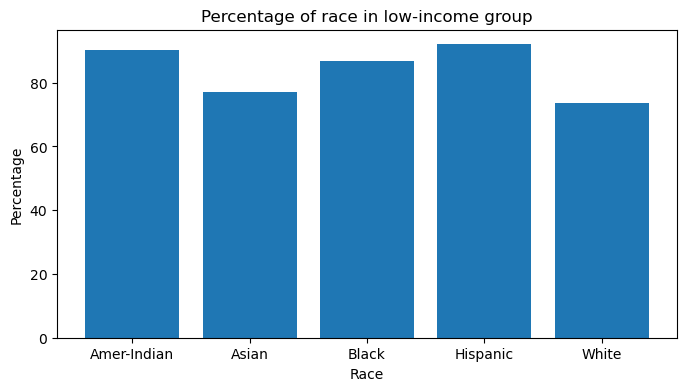

In [23]:
# plotting percentage of race by low income-group
plt.figure(figsize=(8, 4))
plt.bar(plt_df[plt_df.income=='<=50K']['race'], plt_df[plt_df.income=='<=50K']['race_percent'])
plt.xlabel('Race')
plt.ylabel('Percentage')
plt.title('Percentage of race in low-income group')

# Question 5

Compare and contrast the characteristics of the low-income and high-income categories across the different attributes. You may consider first creating separate subsets of the data based on the income categories and then characterizing each subset by observing summary statistics for each group across different variables. Discuss your observations focusing specifically on unique characteristics that seem to distinguish among the two groups. You may (though you are not required to) use charts or plots for visualizing the differences in your analysis.

In [24]:
adlt_df.head()

,age,workclass,education,marital-status,race,sex,hours-per-week,income
0,39,Public,13,Single,White,Male,40,<=50K
1,50,Self-emp,13,Married,White,Male,13,<=50K
2,38,Private,9,Single,White,Male,40,<=50K
3,53,Private,7,Married,Black,Male,40,<=50K
4,28,Private,13,Married,Black,Female,40,<=50K


In [25]:
# define q1, q3 quartile functions

def q1(x):
    return x.quantile(0.25)

def q3(x):
    return x.quantile(0.75)

In [26]:
# get statistical attributes of numeric features by income group
adlt_df.groupby(['income']).agg({'age':['min', q1, 'mean', 'median', q3, 'max'], 
                                'education': ['min', q1, 'mean', 'median', q3, 'max'], 
                                'hours-per-week': ['min', q1, 'mean', 'median', q3, 'max']}).reset_index()

income age                                   education                  \
         min    q1       mean median    q3 max       min   q1       mean   
0  <=50K  17  26.0  36.635979   35.0  45.0  90         1  9.0   9.646976   
1   >50K  19  36.0  43.622251   43.0  50.0  90         2  9.0  11.588185   

                   hours-per-week                                    
  median    q3 max            min    q1       mean median    q3 max  
0    9.0  10.0  16              1  38.0  39.567038   40.0  40.0  99  
1   12.0  13.0  16              1  40.0  45.708495   40.0  50.0  99

In [27]:
adlt_df.income.value_counts()

income
<=50K    7093
>50K     2319
Name: count, dtype: int64

<Axes: title={'center': 'hours-per-week'}, xlabel='income'>

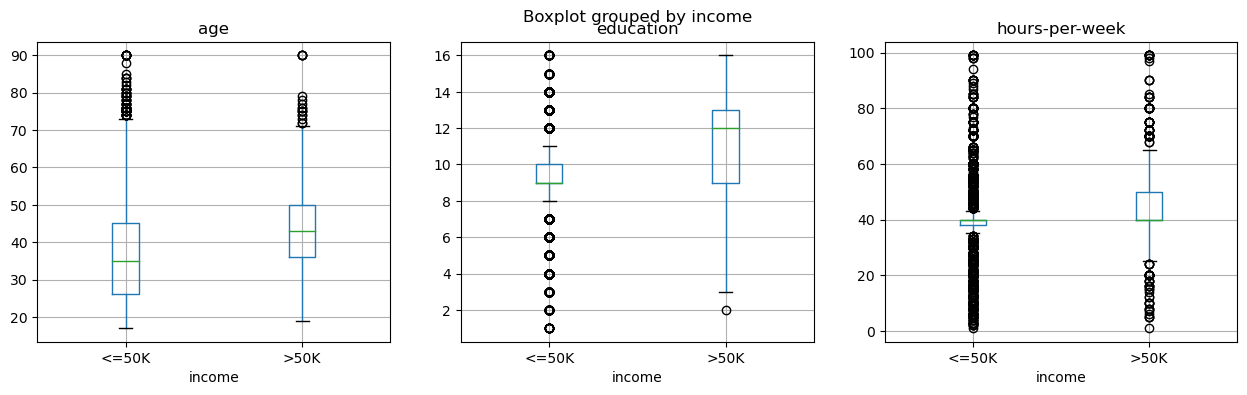

In [28]:
## subplot canvas
plt.figure(figsize=(15, 4))
ax1 = plt.subplot(1,3,1)
ax2 = plt.subplot(1,3,2)
ax3 = plt.subplot(1,3,3)

## plotting boxplots to subplots by income group
adlt_df.boxplot(column='age', by='income', ax=ax1)
adlt_df.boxplot(column='education', by='income', ax=ax2)
adlt_df.boxplot(column='hours-per-week', by='income', ax=ax3)

From the chart above, there is a slight difference in both the income groups:
- Average `age` of high-income group is slightly greater than that of low-income group. This can tell us that high-income group will have more work experience than low-income group.
- Similarly, average `education` is also greater for high-income group. This explains that people with higher education will get more compensated.
- While comparing the quartiles and median of `education`, it is clear that majority of data points are concentrated towards the lower values, dragging the median to lower side. This also might be because of higher data points presence in low-income group.
-  Additionally, by looking at the median age and education, it tells us that even with the presence of outliers in the data, the median values vary for both income groups. It indicates that a substantial portion of the high-income group earns more than a substantial portion of the low-income group.


In [29]:
adlt_df[['sex', 'income']].value_counts()

sex     income
Male    <=50K     4424
Female  <=50K     2669
Male    >50K      1959
Female  >50K       360
Name: count, dtype: int64

Text(0.5, 1.0, 'Sex ratio by income groups')

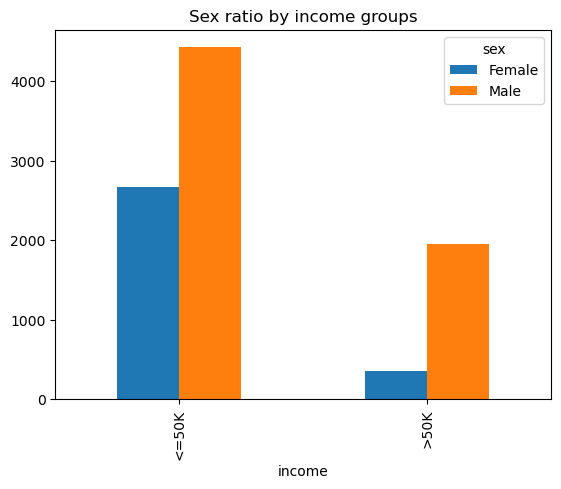

In [30]:
# crosstab of sex ratio by income group
pd.crosstab(adlt_df.income, adlt_df.sex).plot(kind='bar')
plt.title("Sex ratio by income groups")

From the chart above:
- There are less women working in both the income group. 
- Also, workers in high income group is mush lower than low-income group. 

Text(0.5, 1.0, 'Marital status by income groups')

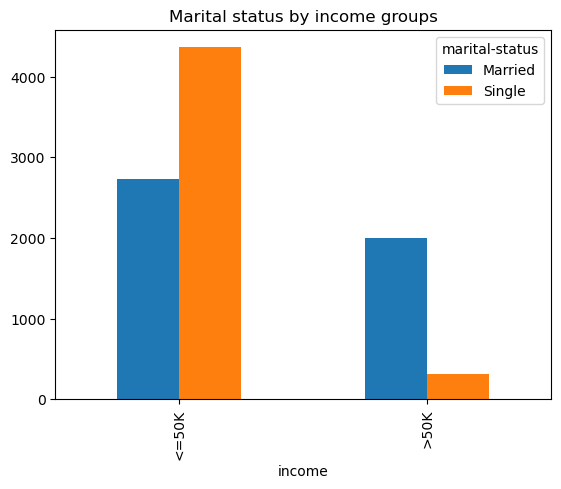

In [31]:
# crosstab of marital status by income group
pd.crosstab(adlt_df.income, adlt_df['marital-status']).plot(kind='bar')
plt.title("Marital status by income groups")

In above chart:
- Single people in low income group is much higher than high income group while high-income group have higher married people. This might be correlated to the age factor, given that, after attaining certain financial stability, people tend to get settled with family.

In [32]:
pd.crosstab(adlt_df.income, adlt_df['race'])

race,Amer-Indian,Asian,Black,Hispanic,White
income,,,,,
<=50K,83,224,773,69,5944
>50K,9,67,119,6,2118


Text(0.5, 1.0, 'Race by income groups')

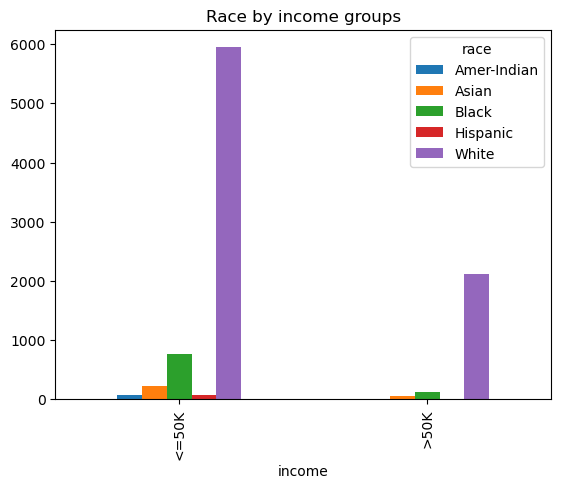

In [33]:
# crosstab of race by income group
pd.crosstab(adlt_df.income, adlt_df['race']).plot(kind='bar')
plt.title("Race by income groups")

From the chart above:
- Looks like both high-income and low-income group have less number of hispanic community. 

In conclusion:
- There is high imbalance in terms of data points in the income groups. This may lead to misleading insights.
- Even though there is imbalance in the dataset, the difference between the two groups can be clearly seen in other characterstics like `age, education, race, sex, etc.` 
- It might be interesting to have the sector as another factor and compare the distribution to get an understanding on how other features behave in accordance with sector.

# Question 6

Convert the data into the standard spreadsheet format. Note that this requires converting each categorical attribute into multiple binary ("dummy") attributes (one for each values of the categorical attribute) and assigning binary values corresponding to the presence or not presence of the attribute value in the original record). The numeric attributes should remain unchanged. Save this data in a new dataframe and show the top 10 rows in the new dataframe. Also save this new table into a local file called adult_numeric.csv.

In [34]:
# filter categorical and numeric dataframe
num_df = adlt_df.select_dtypes(int)
cat_df = adlt_df.select_dtypes(object)

In [35]:
# get dummy data from pd.get_dummies() function
dummy_data = pd.get_dummies(cat_df, dtype=float)

In [36]:
# combine two datasets
final_num_dummy_df = pd.DataFrame()
final_num_dummy_df = pd.concat([num_df, dummy_data], axis=1)

In [37]:
# show first 10 rows
final_num_dummy_df.head(10)

,age,education,hours-per-week,workclass_Private,workclass_Public,workclass_Self-emp,marital-status_Married,marital-status_Single,race_Amer-Indian,race_Asian,race_Black,race_Hispanic,race_White,sex_Female,sex_Male,income_<=50K,income_>50K
0,39,13,40,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1,50,13,13,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,38,9,40,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
3,53,7,40,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,28,13,40,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
5,37,14,40,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
6,49,5,16,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
7,52,9,45,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
8,31,14,50,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
9,42,13,40,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [38]:
# save the dataset
final_num_dummy_df.to_csv('../results/adult_numeric.csv', index=None)

# Question 7

Using the numeric data set with the dummy variables (of the previous part), perform basic correlation analysis among the attributes. You need to construct a complete Correlation Matrix (with rows and columns corresponding to each variable). [Hint: you can create the correlation matrix by using the corr() function in Pandas or corrcoef function in NumPy]. Next, using your correlation matrix, display in decreasing order of correlations, all attributes and their correlations to education. Repeat this step to display correlations with the attribute income_<=50K. Briefly discuss your general observations about this sample of adult population based on this correlation analysis.

In [39]:
# create correlation matrix
corr_df = pd.DataFrame(final_num_dummy_df.corr())

In [40]:
corr_df

,age,education,hours-per-week,workclass_Private,workclass_Public,workclass_Self-emp,marital-status_Married,marital-status_Single,race_Amer-Indian,race_Asian,race_Black,race_Hispanic,race_White,sex_Female,sex_Male,income_<=50K,income_>50K
age,1.000000,0.034733,0.103170,-0.202982,0.080254,0.187633,0.381168,-0.381168,-0.010904,-0.008097,-0.008668,-0.031973,0.022413,-0.071804,0.071804,-0.232261,0.232261
education,0.034733,1.000000,0.141730,-0.154977,0.154462,0.044472,0.050627,-0.050627,-0.039308,0.057360,-0.069029,-0.044845,0.051765,-0.008180,0.008180,-0.329066,0.329066
hours-per-week,0.103170,0.141730,1.000000,-0.097753,-0.021407,0.154025,0.183944,-0.183944,0.002964,0.000550,-0.071442,0.011964,0.055561,-0.221588,0.221588,-0.222686,0.222686
workclass_Private,-0.202982,-0.154977,-0.097753,1.000000,-0.677134,-0.625700,-0.121014,0.121014,-0.007136,-0.015060,0.004632,0.023490,-0.000389,0.072569,-0.072569,0.116453,-0.116453
workclass_Public,0.080254,0.154462,-0.021407,-0.677134,1.000000,-0.150335,-0.002351,0.002351,0.022185,0.012883,0.070250,-0.018927,-0.066491,0.045338,-0.045338,-0.047981,0.047981
workclass_Self-emp,0.187633,0.044472,0.154025,-0.625700,-0.150335,1.000000,0.165075,-0.165075,-0.013931,0.006576,-0.080694,-0.011495,0.071008,-0.145559,0.145559,-0.105593,0.105593
marital-status_Married,0.381168,0.050627,0.183944,-0.121014,-0.002351,0.165075,1.000000,-1.000000,-0.013614,0.017852,-0.104427,0.000605,0.082114,-0.357736,0.357736,-0.414173,0.414173
marital-status_Single,-0.381168,-0.050627,-0.183944,0.121014,0.002351,-0.165075,-1.000000,1.000000,0.013614,-0.017852,0.104427,-0.000605,-0.082114,0.357736,-0.357736,0.414173,-0.414173
race_Amer-Indian,-0.010904,-0.039308,0.002964,-0.007136,0.022185,-0.013931,-0.013614,0.013614,1.000000,-0.017746,-0.032148,-0.008905,-0.242795,0.021711,-0.021711,0.034254,-0.034254
race_Asian,-0.008097,0.057360,0.000550,-0.015060,0.012883,0.006576,0.017852,-0.017852,-0.017746,1.000000,-0.057795,-0.016009,-0.436496,0.001773,-0.001773,0.006693,-0.006693


In [41]:
# correlations of all attributes and their correlations to education
corr_df[['education']].sort_values('education', ascending=False)

,education
education,1.000000
income_>50K,0.329066
workclass_Public,0.154462
hours-per-week,0.141730
race_Asian,0.057360
race_White,0.051765
marital-status_Married,0.050627
workclass_Self-emp,0.044472
age,0.034733
sex_Male,0.008180


In [42]:
# correlations with the attribute income_<=50K.
corr_df[['income_<=50K']].sort_values('income_<=50K', ascending=False)

,income_<=50K
income_<=50K,1.000000
marital-status_Single,0.414173
sex_Female,0.203886
workclass_Private,0.116453
race_Black,0.084836
race_Hispanic,0.034607
race_Amer-Indian,0.034254
race_Asian,0.006693
workclass_Public,-0.047981
race_White,-0.092589


From the correlation tables above:
- `income_>50K` and `education` are positively correlated. This is self-explanatory given that higher education will lead to higher compensations. 
- There is very slight correlation between `education` and `sex_Male`. This correlation is very weak, which might be surprising given that we'd expect some level of correlation between the two. 
- `income_<=50K` and `marital-status_Single` are highly correlated. This is due to the correlation of age and marital-status. As people during young age tend to be single and may belong to low income group.
- Contrarily, `income_<=50K` and `marital-status_Married` are negatively correlated. This again supports our assumption of correlation of age and marital-status.

# Question 8

Discretize the age attribute into 3 categories (corresponding to "young", "mid-age", and "old"). Do not change the original age attribute or add the discretized age to the table. Create a new dataframe with the numeric and the discretized age attributes as two columns and display the top 10 rows of the new dataframe.

In [43]:
# create bins and labels for 3 age categories
bins = [0, 30, 50, 90]
labels = ['Young', 'Mid-Age', 'Old']

In [44]:
# numeric data
num_df = adlt_df.select_dtypes(int)

In [45]:
# map labels to age using pd.cut()
num_df['age_group'] = pd.cut(num_df.age, bins=bins, labels=labels)

In [46]:
num_df.head(10)

,age,education,hours-per-week,age_group
0,39,13,40,Mid-Age
1,50,13,13,Mid-Age
2,38,9,40,Mid-Age
3,53,7,40,Old
4,28,13,40,Young
5,37,14,40,Mid-Age
6,49,5,16,Mid-Age
7,52,9,45,Old
8,31,14,50,Mid-Age
9,42,13,40,Mid-Age


# Question 9

Use Min-Max Normalization to transform the values of the attribute hours-per-week the range 0.0-1.0 (without changing the original data). Next, perform zscore normalization to standardize the values of all numeric attributes (age, hours-per-week, education). The latter step should be performed on all three attributes at the same time instead of one-by-one (you may wish to first create a separate dataframe with only these attributes and perform the operation on the whole dataframe. Note: for this problem, you should write your own code to perform the normalization; do not use pre-existing functions such as scikit-learn's MinMaxScaler(). Finally, show the top 10 rows of the three versions of the hours-per-week attribute (original, normalized, and standardized) side-by-side in a new dataframe.

## Min-Max Normalization

In [47]:
# numeric dataframe
num_df = adlt_df.select_dtypes(int)

In [48]:
def minMaxNormalization(col):
    """
        Function to perform Min-Max Normalization on numeric feature
        args:
            col_name: column name (must be Series)
        return:
            norm_vals: normalized values
    """
    # get min max values
    max_value = col.max()
    min_value = col.min()
    
    #  Min-max normalization on the column
    norm_vals = (col - min_value) / (max_value - min_value)
    
    return norm_vals

In [49]:
num_df['hours-per-week-min_max_norm'] = minMaxNormalization(num_df['hours-per-week'])

In [50]:
def zScoreNormalization(num_df):
    """
        Function to perform Z-score normalization on dataframe
        args:
            num_df: dataframe (must contain all numeric features)
        return:
            znorm_df: z score normalized dataframe
    """
    for col in num_df.columns:
        mean_val = num_df[col].mean()
        sd_val = num_df[col].std()
        num_df[f'{col}_znorm'] = (num_df[col] - mean_val) / sd_val
    
    return num_df

In [51]:
final_norm_df = zScoreNormalization(num_df)

In [52]:
req_col_list = ['hours-per-week', 'hours-per-week-min_max_norm', 'hours-per-week_znorm']

In [53]:
norm_out_df = pd.DataFrame()
norm_out_df = final_norm_df[req_col_list]

In [54]:
norm_out_df.head(10)

,hours-per-week,hours-per-week-min_max_norm,hours-per-week_znorm
0,40,0.397959,-0.090892
1,13,0.122449,-2.362742
2,40,0.397959,-0.090892
3,40,0.397959,-0.090892
4,40,0.397959,-0.090892
5,40,0.397959,-0.090892
6,16,0.153061,-2.110314
7,45,0.448980,0.329821
8,50,0.500000,0.750534
9,40,0.397959,-0.090892


# Question 10

Now download a modified version of the data  (adult-modified-missing-vals.csv) that contains missing values. 
- Using Pandas determine all the attributes with missing values and the number of missing values for each such attribute. 
- Show all the instances in the data that contain a missing value. 
- Fill the missing values for all numeric attributes using the mean value for the attribute. 
- After filling in the missing numeric values, drop all rows where a categorical attribute contains a missing value. 
- Show that the final resulting table does not contain missing values.

## a. Using Pandas determine all the attributes with missing values and the number of missing values for each such attribute. 

In [55]:
# read new file (with missing vals)
adlt_missing_df = pd.read_csv('../data/adult-modified-missing-vals.csv', na_values='?')

In [56]:
adlt_missing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             9802 non-null   float64
 1   workclass       9412 non-null   object 
 2   education       10000 non-null  int64  
 3   marital-status  10000 non-null  object 
 4   race            10000 non-null  object 
 5   sex             10000 non-null  object 
 6   hours-per-week  10000 non-null  int64  
 7   income          10000 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 625.1+ KB


In [57]:
adlt_missing_df

,age,workclass,education,marital-status,race,sex,hours-per-week,income
0,39.0,Public,13,Single,White,Male,40,<=50K
1,50.0,Self-emp,13,Married,White,Male,13,<=50K
2,38.0,Private,9,Single,White,Male,40,<=50K
3,53.0,Private,7,Married,Black,Male,40,<=50K
4,28.0,Private,13,Married,Black,Female,40,<=50K
...,...,...,...,...,...,...,...,...
9995,38.0,Private,10,Married,White,Male,60,>50K
9996,25.0,Private,9,Single,White,Female,8,<=50K
9997,21.0,Private,10,Single,Black,Male,40,<=50K
9998,NaN,Private,2,Married,White,Male,53,<=50K


In [58]:
adlt_missing_df.isna().sum()

age               198
workclass         588
education           0
marital-status      0
race                0
sex                 0
hours-per-week      0
income              0
dtype: int64

## b. Show all the instances in the data that contain a missing value. 

In [59]:
adlt_missing_df[adlt_missing_df.isnull().any(axis = 1)]

,age,workclass,education,marital-status,race,sex,hours-per-week,income
19,NaN,Self-emp,14,Single,White,Female,45,>50K
27,NaN,NaN,10,Married,Asian,Male,60,>50K
40,NaN,Private,5,Married,White,Male,43,<=50K
61,32.0,NaN,4,Married,White,Male,40,<=50K
65,NaN,Private,9,Married,White,Male,40,<=50K
...,...,...,...,...,...,...,...,...
9965,NaN,Private,10,Married,Amer-Indian,Female,40,<=50K
9966,NaN,Private,13,Married,White,Male,50,>50K
9987,67.0,NaN,4,Married,White,Male,40,<=50K
9993,NaN,Private,9,Married,White,Female,15,<=50K


## c. Fill the missing values for all numeric attributes using the mean value for the attribute.

In [60]:
# only age column which is numeric has missing value
## mean age
avg_age = adlt_missing_df['age'].mean()
adlt_missing_df['age'] = adlt_missing_df.age.fillna(avg_age)

## d. After filling in the missing numeric values, drop all rows where a categorical attribute contains a missing value. 

In [61]:
adlt_missing_df.isna().sum()

age                 0
workclass         588
education           0
marital-status      0
race                0
sex                 0
hours-per-week      0
income              0
dtype: int64

In [62]:
# filter out rows with missing values

adlt_missing_df = adlt_missing_df[~adlt_missing_df.workclass.isna()]

In [63]:
adlt_missing_df.isna().sum()

age               0
workclass         0
education         0
marital-status    0
race              0
sex               0
hours-per-week    0
income            0
dtype: int64

## e. Show that the final resulting table does not contain missing values.

In [64]:
adlt_missing_df

,age,workclass,education,marital-status,race,sex,hours-per-week,income
0,39.000000,Public,13,Single,White,Male,40,<=50K
1,50.000000,Self-emp,13,Married,White,Male,13,<=50K
2,38.000000,Private,9,Single,White,Male,40,<=50K
3,53.000000,Private,7,Married,Black,Male,40,<=50K
4,28.000000,Private,13,Married,Black,Female,40,<=50K
...,...,...,...,...,...,...,...,...
9995,38.000000,Private,10,Married,White,Male,60,>50K
9996,25.000000,Private,9,Single,White,Female,8,<=50K
9997,21.000000,Private,10,Single,Black,Male,40,<=50K
9998,38.449806,Private,2,Married,White,Male,53,<=50K


In [65]:
# check missing value count
adlt_missing_df.isna().sum()

age               0
workclass         0
education         0
marital-status    0
race              0
sex               0
hours-per-week    0
income            0
dtype: int64

In [66]:
# check for rows with missing values

adlt_missing_df[adlt_missing_df.isna().any(axis=1)]

,age,workclass,education,marital-status,race,sex,hours-per-week,income
